Analysis of the correlation of Health Spending and Dengue Cases

Imports

In [16]:
import numpy as np
import pandas as pd
import geopandas as gpd
import statsmodels.api as sm

import matplotlib as mpl
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import seaborn as sns

import datetime

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Copy of GRP2_SDG3_Datasheet.xlsx to Copy of GRP2_SDG3_Datasheet.xlsx


Styles

--2025-12-08 12:11:07--  https://github.com/openmaptiles/fonts/raw/master/roboto/Roboto-Light.ttf
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/openmaptiles/fonts/master/roboto/Roboto-Light.ttf [following]
--2025-12-08 12:11:07--  https://raw.githubusercontent.com/openmaptiles/fonts/master/roboto/Roboto-Light.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162420 (159K) [application/octet-stream]
Saving to: ‘Roboto-Light.ttf’

Roboto-Light.ttf    100%[===================>] 158.61K  --.-KB/s    in 0.03s   

2025-12-08 12:11:07 (4.57 MB/s) - ‘Roboto-Light.ttf’ saved [162420/162420]

--2025-1

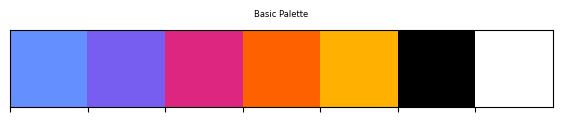

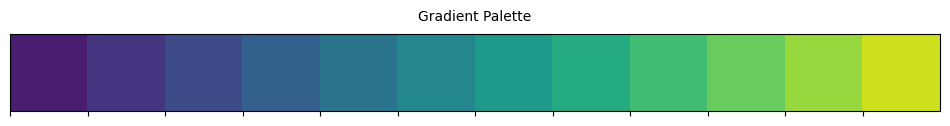

In [5]:
# @title Download fonts
!wget 'https://github.com/openmaptiles/fonts/raw/master/roboto/Roboto-Light.ttf'
!wget 'https://github.com/openmaptiles/fonts/raw/master/roboto/Roboto-Regular.ttf'
!wget 'https://github.com/openmaptiles/fonts/raw/master/roboto/Roboto-Medium.ttf'
!wget 'https://github.com/openmaptiles/fonts/raw/master/roboto/Roboto-Bold.ttf'

# @title Typesetting
# https://stackoverflow.com/a/65841091
from matplotlib import font_manager as fm, pyplot as plt

font_files = fm.findSystemFonts('.')

# Install fonts
for font_file in font_files:
  fm.fontManager.addfont(font_file)

# @title Colors
colors = ["#648FFF", "#785EF0", "#DC267F", "#FE6100", "#FFB000", "#000000", "#FFFFFF"]
colors_grad = sns.color_palette('viridis',  12)
colors_heat1 = sns.color_palette('viridis', as_cmap=True)

color_bg = "#1B181C"
color_text = "#FFFFFF"


sns.palplot(colors)
plt.gca().set_title('Basic Palette', fontsize=6, pad=10)

sns.palplot(colors_grad)
plt.gca().set_title('Gradient Palette', fontsize=10, pad=10)

plt.show()

# Heatmap Palette (1-way)
colors_heat1

# @title Plot settings
mpl.rcParams['figure.dpi'] = 600
mpl.rcParams["figure.figsize"] = 16,8

# Text
mpl.rcParams['font.family'] = 'Roboto'

# Title
mpl.rcParams['figure.titlesize'] = 22
mpl.rcParams['axes.titlesize'] = 22
mpl.rcParams['axes.titleweight'] = 'bold'

# Labels
mpl.rcParams['axes.labelsize'] = 18
mpl.rcParams['xtick.labelsize'] = 18
mpl.rcParams['ytick.labelsize'] = 18

# Spacing
mpl.rcParams['axes.titlepad'] = 72
mpl.rcParams['axes.labelpad'] = 10
mpl.rcParams['xtick.major.pad'] = 10
mpl.rcParams['ytick.major.pad'] = 10
mpl.rcParams['xtick.major.width'] = 0
mpl.rcParams['xtick.minor.width'] = 0
mpl.rcParams['ytick.major.width'] = 0
mpl.rcParams['ytick.minor.width'] = 0

# Spines and grids
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.grid'] = False

# Legends
mpl.rcParams['legend.title_fontsize'] = 18
mpl.rcParams['legend.fontsize'] = 18
mpl.rcParams['legend.frameon'] = False

# Bars
plt.rcParams['patch.linewidth'] = 0
plt.rcParams['patch.edgecolor'] = 'none'

# Colors
mpl.rcParams["figure.facecolor"] = color_bg
mpl.rcParams["axes.facecolor"] = color_bg
mpl.rcParams["savefig.facecolor"] = color_bg

# Text colors
mpl.rcParams['text.color'] = color_text
mpl.rcParams['axes.labelcolor'] = color_text
mpl.rcParams['xtick.color'] = color_text
mpl.rcParams['ytick.color'] = color_text

# Line colors
mpl.rcParams['axes.edgecolor'] = color_text

Analysis


Imports and organisation of data

In [13]:
dengue = pd.read_excel("Copy of GRP2_SDG3_Datasheet.xlsx", sheet_name="Dengue Cases")
health = pd.read_excel("Copy of GRP2_SDG3_Datasheet.xlsx", sheet_name="Health Expenditure")

# Normalize column names by stripping whitespace
dengue.columns = dengue.columns.str.strip()
health.columns = health.columns.str.strip()

dengue_trimmed = dengue[dengue["Year"] >= 2017].copy()
merged = dengue_trimmed.merge(health, on="Year", how="left")
sorted_merged = merged.sort_values("Year")

Data Analysis

In [15]:
corr = sorted_merged["Cases"].corr(sorted_merged["Amount in Millions"])
print("Correlation:", corr)

#Close to 0, so it seems, there is not much of a relation between the two variables
#However, this was a simple test so i'll conduct more

Correlation: 0.027991547077381655


Simple Linear Regression

In [17]:
X = merged["Amount in Millions"]
y = merged["Cases"]

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

#looking again, there is next to no relation

                            OLS Regression Results                            
Dep. Variable:                  Cases   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     8.817
Date:                Mon, 08 Dec 2025   Prob (F-statistic):            0.00299
Time:                        12:21:33   Log-Likelihood:                -80462.
No. Observations:               11246   AIC:                         1.609e+05
Df Residuals:                   11244   BIC:                         1.609e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                126.9169     11

Revised Simple Linear Regression

In [19]:
annual = dengue.groupby("Year")["Cases"].sum().reset_index()
new_merged = annual.merge(health, on="Year", how="left")

X = sm.add_constant(new_merged["Amount in Millions"])
y = new_merged["Cases"]

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Cases   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.163
Method:                 Least Squares   F-statistic:                   0.02147
Date:                Mon, 08 Dec 2025   Prob (F-statistic):              0.888
Time:                        12:30:53   Log-Likelihood:                -104.41
No. Observations:                   8   AIC:                             212.8
Df Residuals:                       6   BIC:                             213.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2.002e+05   1.88

Visualization

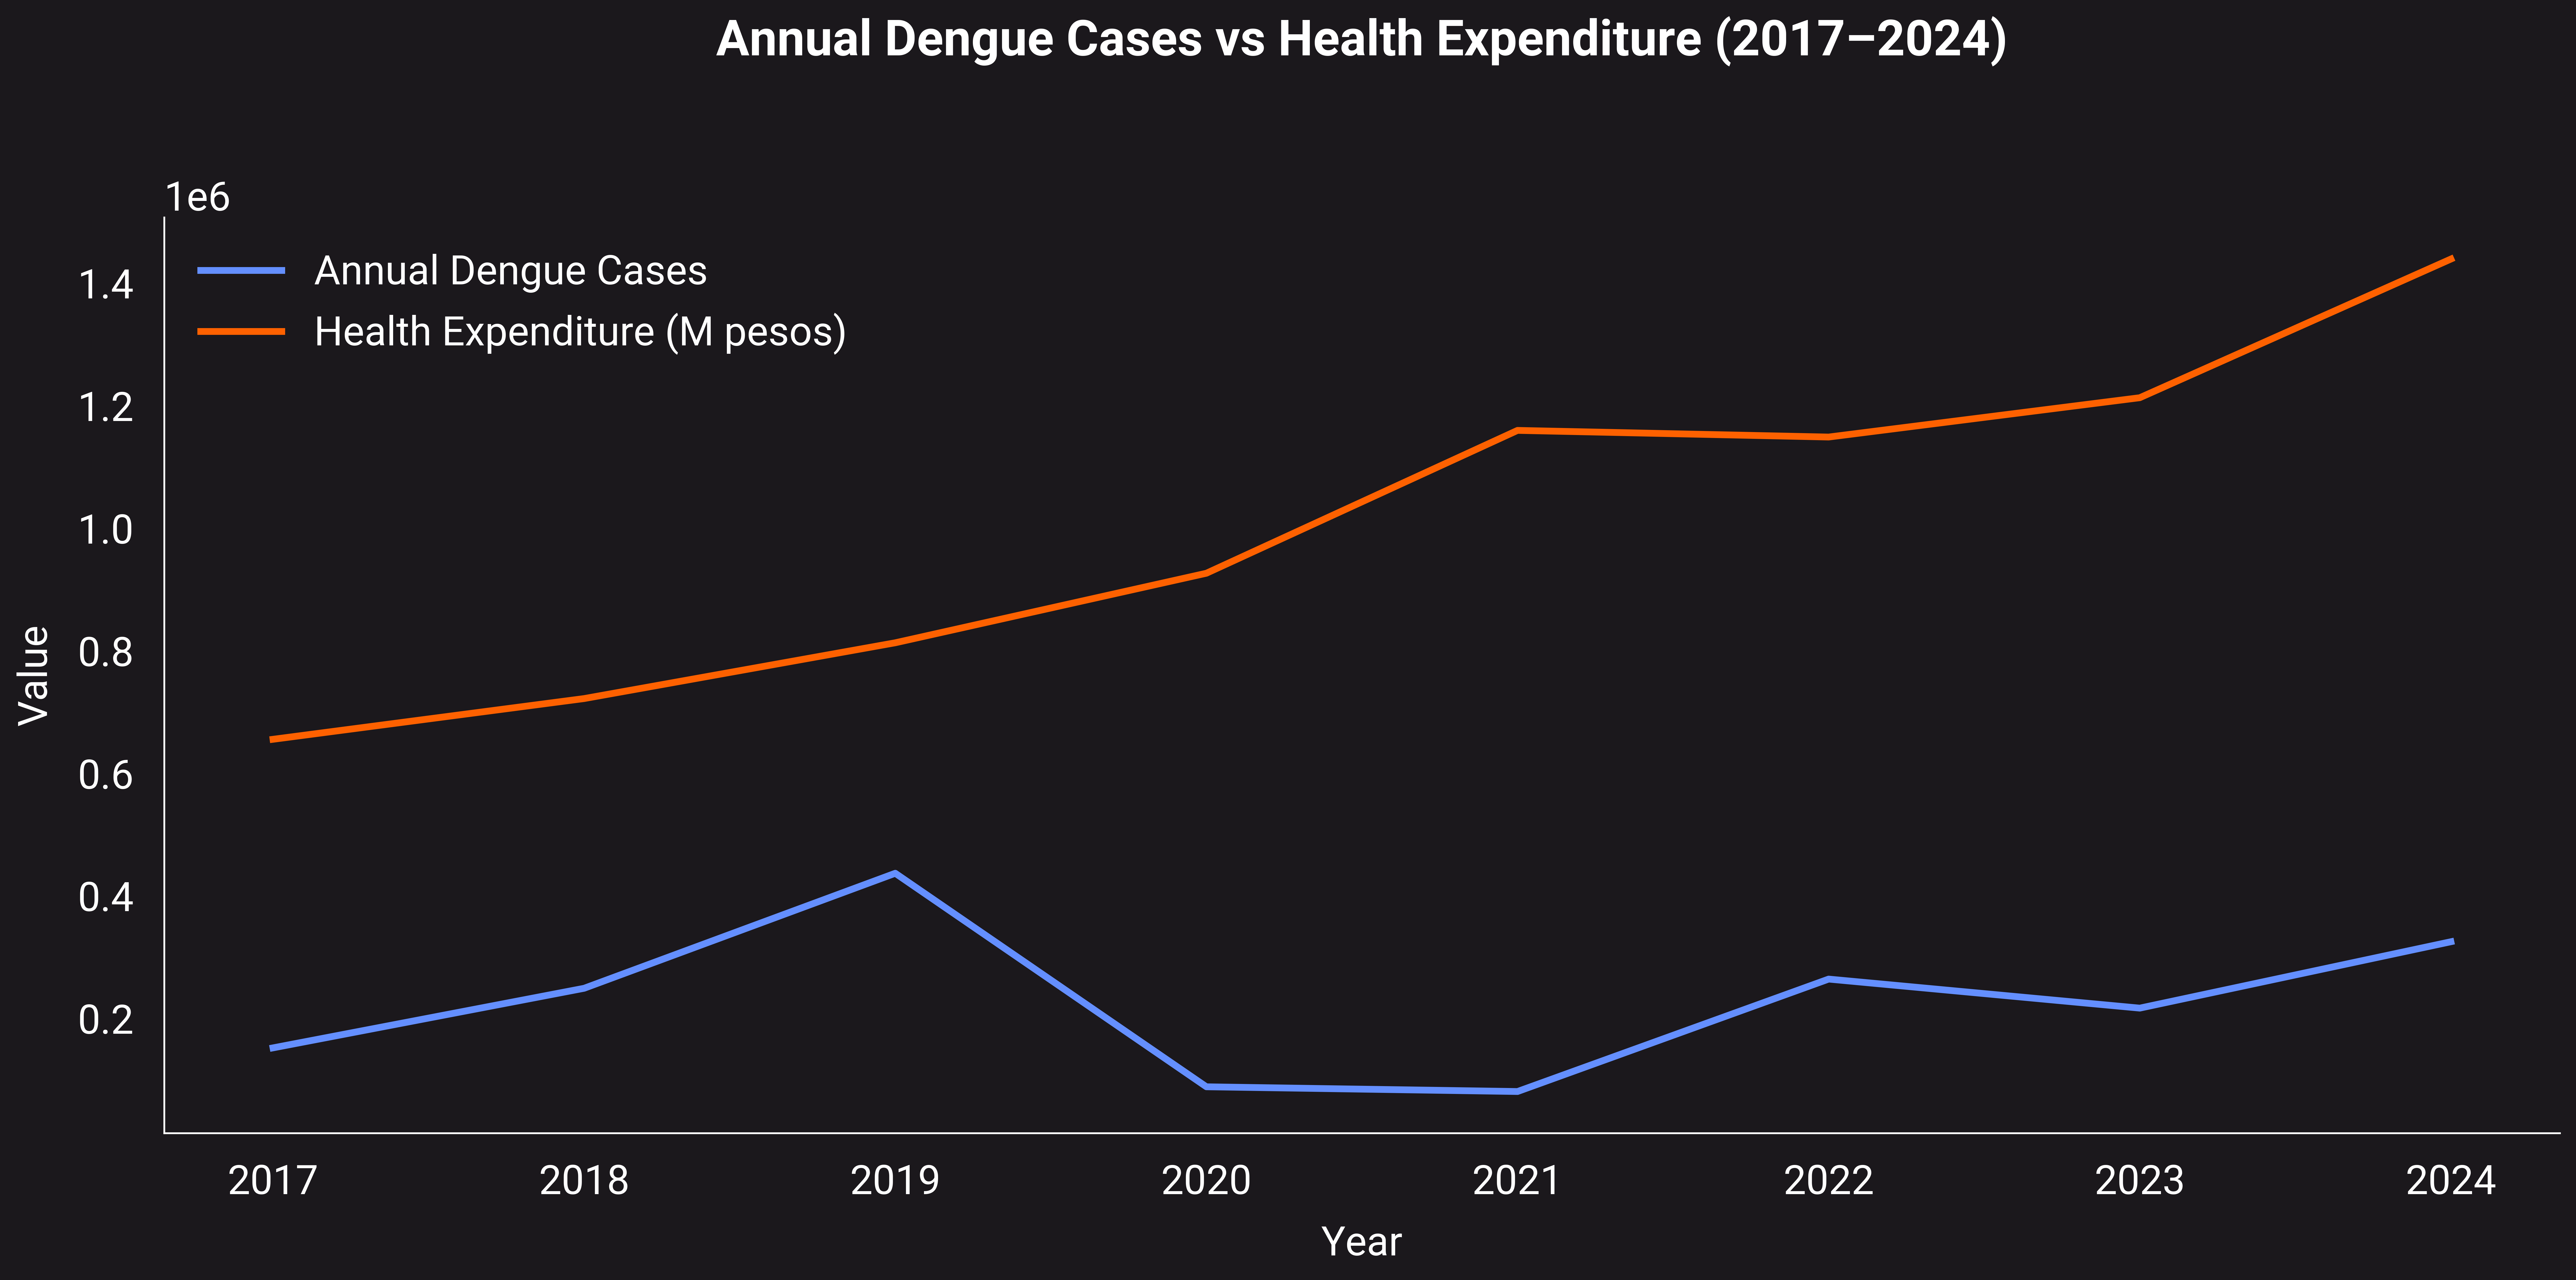

In [20]:
plt.figure()

plt.plot(
    new_merged["Year"],
    new_merged["Cases"],
    label="Annual Dengue Cases",
    linewidth=3,
    color=colors[0]
)

plt.plot(
    new_merged["Year"],
    new_merged["Amount in Millions"],
    label="Health Expenditure (M pesos)",
    linewidth=3,
    color=colors[3]
)

plt.title("Annual Dengue Cases vs Health Expenditure (2017–2024)")
plt.xlabel("Year")
plt.ylabel("Value")
plt.legend()

plt.tight_layout()
plt.show()

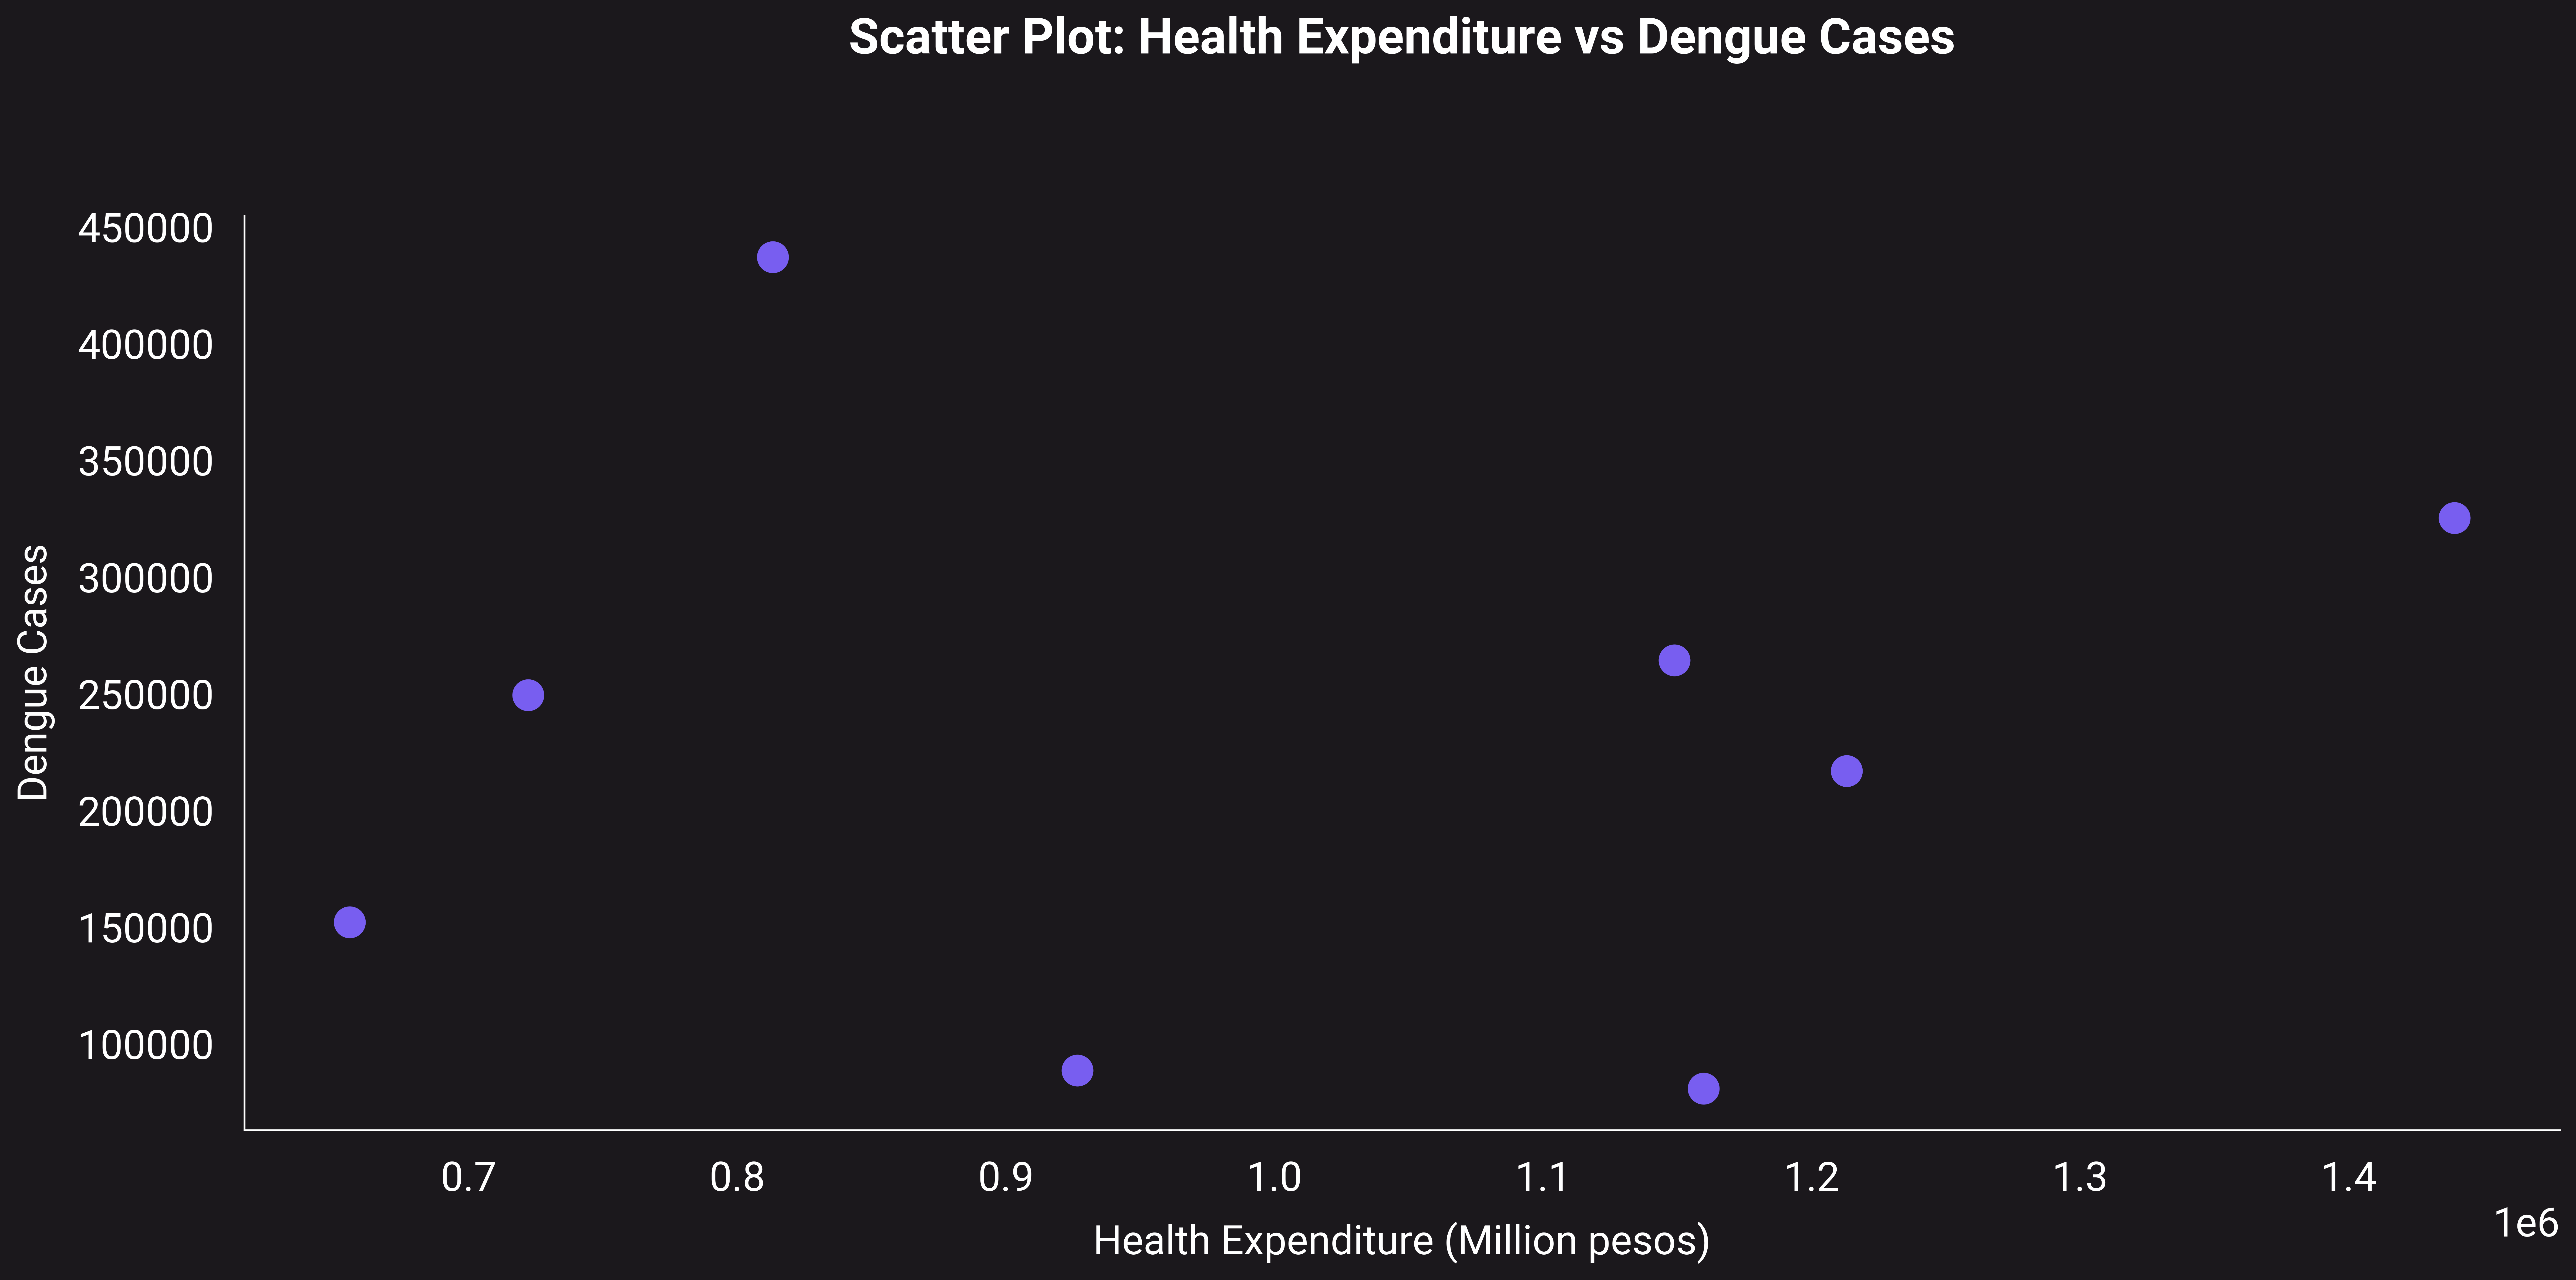

In [21]:
plt.figure()

plt.scatter(
    new_merged["Amount in Millions"],
    new_merged["Cases"],
    s=200,
    color=colors[1]
)

plt.title("Scatter Plot: Health Expenditure vs Dengue Cases")
plt.xlabel("Health Expenditure (Million pesos)")
plt.ylabel("Dengue Cases")

plt.tight_layout()
plt.show()